Sections required in your report:

- Main objective of the analysis that specifies whether your model will be focused on prediction or interpretation and the benefits that your analysis provides to the business or stakeholders of this data.
    
- Brief description of the data set you chose, a summary of its attributes, and an outline of what you are trying to accomplish with this analysis.
    
- Brief summary of data exploration and actions taken for data cleaning and feature engineering.
    
- Summary of training at least three different classifier models, preferably of different nature in explainability and predictability. For example, you can start with a simple logistic regression as a baseline, adding other models or ensemble models. Preferably, all your models use the same training and test splits, or the same cross-validation method.
    
- A paragraph explaining which of your classifier models you recommend as a final model that best fits your needs in terms of accuracy and explainability.
    
- Summary Key Findings and Insights, which walks your reader through the main drivers of your model and insights from your data derived from your classifier model.
    
- Suggestions for next steps in analyzing this data, which may include suggesting revisiting this model after adding specific data features that may help you achieve a better explanation or a better prediction.

# Main Objective

### Predicting if a customer will churn, benifits are self explanitory. 

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

# Data Description:

# Exploritory Data Analysis

In [2]:
df = pd.read_csv('Telco-Customer-Churn.csv')

In [3]:
len(df)

7043

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [6]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

TotalCharges isn't correctly identified as a numeric type.
we can force thi scolumn to be numeric by converting it to numbers using a special function in pandas: to_numeric. By default, thi sfunction raises an exception when it sees nonnumeric data (such as spaces), but we can make it skip these cases by specifying the errors='coerce' option. Thi sway pandas will replace all nonnumeric values iwht NaN

then we will set the missing values to zero

In [7]:
total_charges = pd.to_numeric(df.TotalCharges, errors='coerce')
df[total_charges.isnull()][['customerID', 'TotalCharges']]
df.TotalCharges = df.TotalCharges.fillna(0)

The column names don't follow ther same naming convention. Some of them start with a lower letter, whereas others start with a capital letter, and there are also spaces in the vlaues. 

we will make it uniform by lowercasing everything and replacing spaces with underscores. 

In [8]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
string_columns = list(df.dtypes[df.dtypes == 'object'].index)

for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

Target variable is churn.

its categorical with two values 'yes' and 'no'. we need to convert these values for binary classification.

In [9]:
df.churn = (df.churn == 'yes').astype(int)

In [10]:
from sklearn.model_selection import train_test_split

the function train_test_split takes a dataframe df and creates two new dataframes: df_train_full and df_test

In [11]:
df_train_full, df_test = train_test_split(df,test_size=0.2, 
                                          random_state=1)

In [12]:
df_train_full.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
1814,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
5946,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
3881,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
2389,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
3676,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0


we want to split the data into three parts:
* train
* validation
* test

since train_test_split splits the data into only two parts: train and test, we will take the df_train_full dataframe and split it one more time into train and validation.

In [13]:
df_train, df_val = train_test_split(df_train_full, test_size=0.33, 
                                    random_state=11)

y_train = df_train.churn.values
y_val = df_val.churn.values

del df_train['churn']
del df_val['churn']

The dataframes are now prepared and we can use the training dataset for performing initial exploritory data analysis (EDA).

In [14]:
df_train_full.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

we get all zeros so we know we have no missing values

we also need to check the distribution of values in the target variable. We can do that with the value_counts() method.

In [15]:
df_train_full.churn.value_counts()

0    4113
1    1521
Name: churn, dtype: int64

The first column is the value of the target variable, and the second is the count. we can see the majority of the customers didn't churn. 

In [16]:
1521/5634

0.26996805111821087

We can also calculate the churn rate thats more convenient  with the mean() method.

In [17]:
global_mean = df_train_full.churn.mean()
global_mean

0.26996805111821087

In [18]:
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents', 'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod']
numerical = ['tenure', 'monthlycharges', 'totalcharges']

In [19]:
df_train_full[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

In [20]:
female_mean = df_train_full[df_train_full.gender == 'female'].churn.mean()

In [21]:
male_mean = df_train_full[df_train_full.gender == 'male'].churn.mean()

In [22]:
female_mean


0.27682403433476394

In [23]:
male_mean

0.2632135306553911

In [24]:
female_mean - male_mean

0.013610503679372832

In [25]:
partner_yes = df_train_full[df_train_full.partner == 'yes'].churn.mean()
print('partner == yes:', round(partner_yes, 3))

partner_no = df_train_full[df_train_full.partner == 'no'].churn.mean()
print('partner == no:', round(partner_no, 3))

partner == yes: 0.205
partner == no: 0.33


risk ratio

risk = group rate / global rate

ex. for gender == female
risk = 27.2% / 27% = 1.02

To check all the values a variable has and compute the churn rate for each of these valeus we will use a rough pandas translation of the below sql

SELECT
    gender, AVG(churn),
    AVG(churn) - global_churn, 
    AVG(churn) / global_churn
FROM 
    data
GROUP BY
    gender

In [26]:
global_mean = df_train_full.churn.mean()

df_group = df_train_full.groupby(by='gender').churn.agg(['mean'])
df_group['diff'] = df_group['mean']- global_mean
df_group['risk'] = df_group['mean'] / global_mean

df_group

,mean,diff,risk
gender,,,
female,0.276824,0.006856,1.025396
male,0.263214,-0.006755,0.974980


now do the same thing for categorical variables. 

In [27]:
from IPython.display import display

for col in categorical:
    df_group = df_train_full.groupby(by=col).churn.agg(['mean'])
    df_group['diff'] = df_group['mean'] - global_mean
    df_group['rate'] = df_group['mean'] / global_mean
    display(df_group)

,mean,diff,rate
gender,,,
female,0.276824,0.006856,1.025396
male,0.263214,-0.006755,0.974980


,mean,diff,rate
seniorcitizen,,,
0,0.242270,-0.027698,0.897403
1,0.413377,0.143409,1.531208


,mean,diff,rate
partner,,,
no,0.329809,0.059841,1.221659
yes,0.205033,-0.064935,0.759472


,mean,diff,rate
dependents,,,
no,0.313760,0.043792,1.162212
yes,0.165666,-0.104302,0.613651


,mean,diff,rate
phoneservice,,,
no,0.241316,-0.028652,0.893870
yes,0.273049,0.003081,1.011412


,mean,diff,rate
multiplelines,,,
no,0.257407,-0.012561,0.953474
no_phone_service,0.241316,-0.028652,0.893870
yes,0.290742,0.020773,1.076948


,mean,diff,rate
internetservice,,,
dsl,0.192347,-0.077621,0.712482
fiber_optic,0.425171,0.155203,1.574895
no,0.077805,-0.192163,0.288201


,mean,diff,rate
onlinesecurity,,,
no,0.420921,0.150953,1.559152
no_internet_service,0.077805,-0.192163,0.288201
yes,0.153226,-0.116742,0.567570


,mean,diff,rate
onlinebackup,,,
no,0.404323,0.134355,1.497672
no_internet_service,0.077805,-0.192163,0.288201
yes,0.217232,-0.052736,0.804660


,mean,diff,rate
deviceprotection,,,
no,0.395875,0.125907,1.466379
no_internet_service,0.077805,-0.192163,0.288201
yes,0.230412,-0.039556,0.853480


,mean,diff,rate
techsupport,,,
no,0.418914,0.148946,1.551717
no_internet_service,0.077805,-0.192163,0.288201
yes,0.159926,-0.110042,0.592390


,mean,diff,rate
streamingtv,,,
no,0.342832,0.072864,1.269897
no_internet_service,0.077805,-0.192163,0.288201
yes,0.302723,0.032755,1.121328


,mean,diff,rate
streamingmovies,,,
no,0.338906,0.068938,1.255358
no_internet_service,0.077805,-0.192163,0.288201
yes,0.307273,0.037305,1.138182


,mean,diff,rate
contract,,,
month-to-month,0.431701,0.161733,1.599082
one_year,0.120573,-0.149395,0.446621
two_year,0.028274,-0.241694,0.104730


,mean,diff,rate
paperlessbilling,,,
no,0.172071,-0.097897,0.637375
yes,0.338151,0.068183,1.252560


,mean,diff,rate
paymentmethod,,,
bank_transfer_(automatic),0.168171,-0.101797,0.622928
credit_card_(automatic),0.164339,-0.105630,0.608733
electronic_check,0.455890,0.185922,1.688682
mailed_check,0.193870,-0.076098,0.718121


In [28]:
from sklearn.metrics import mutual_info_score

def calculate_mi(series):
    return mutual_info_score(series, df_train_full.churn)

df_mi = df_train_full[categorical].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')
df_mi

,MI
contract,0.098320
onlinesecurity,0.063085
techsupport,0.061032
internetservice,0.055868
onlinebackup,0.046923
deviceprotection,0.043453
paymentmethod,0.043210
streamingtv,0.031853
streamingmovies,0.031581
paperlessbilling,0.017589


In [29]:
df_train_full[numerical].corrwith(df_train_full.churn)

tenure           -0.351885
monthlycharges    0.196805
dtype: float64

In [30]:
train_dict = df_train[categorical + numerical].to_dict(orient='records')

In [31]:
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

DictVectorizer(sparse=False)

In [32]:
X_train = dv.transform(train_dict)

In [33]:
X_train[0]

array([0., 0., 1., ..., 0., 0., 0.])

In [34]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', ..., 'totalcharges=999.45',
       'totalcharges=999.9', 'totalcharges=_'], dtype=object)

In [35]:
def logistic_regression(xi):
    score = bias
    for j in range(n):
        score = score +xi[j] * w[j]
    prob = sigmoid(score)

In [36]:
import math
def sigmoid(score):
    return 1 / (1 + math.exp(-score))

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
model = LogisticRegression(solver='liblinear', random_state=1)
model.fit(X_train, y_train)

LogisticRegression(random_state=1, solver='liblinear')

In [39]:
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [40]:
y_pred = model.predict_proba(X_val)

In [41]:
y_pred = model.predict_proba(X_val)[:, 1]

In [42]:
churn = y_pred >= 0.5

In [43]:
(y_val == churn).mean()

0.8064516129032258

To see which feature is associated with each weight, use the get_feature_names method of the DictVectorizer. Then zip the feature names together with the coefficients before looking at them

In [44]:
dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))

{'contract=month-to-month': 0.59,
 'contract=one_year': 0.006,
 'contract=two_year': -0.735,
 'dependents=no': -0.021,
 'dependents=yes': -0.119,
 'deviceprotection=no': 0.077,
 'deviceprotection=no_internet_service': -0.18,
 'deviceprotection=yes': -0.037,
 'gender=female': -0.034,
 'gender=male': -0.105,
 'internetservice=dsl': -0.43,
 'internetservice=fiber_optic': 0.471,
 'internetservice=no': -0.18,
 'monthlycharges': -0.001,
 'multiplelines=no': -0.191,
 'multiplelines=no_phone_service': 0.018,
 'multiplelines=yes': 0.034,
 'onlinebackup=no': 0.103,
 'onlinebackup=no_internet_service': -0.18,
 'onlinebackup=yes': -0.062,
 'onlinesecurity=no': 0.24,
 'onlinesecurity=no_internet_service': -0.18,
 'onlinesecurity=yes': -0.199,
 'paperlessbilling=no': -0.227,
 'paperlessbilling=yes': 0.087,
 'partner=no': -0.055,
 'partner=yes': -0.084,
 'paymentmethod=bank_transfer_(automatic)': -0.046,
 'paymentmethod=credit_card_(automatic)': -0.148,
 'paymentmethod=electronic_check': 0.19,
 'paym

Tp understand how the model works and to build the intution. let's train a simpler and smaller model that uses only three variables: congtract, tenure, and totalcharges. 

we will redo the same steps we did for training, this time using a smaller set of features. (no additional preprocessing for tenure and totalcharges since they are numneric. contract is categorical so we need to apply one-hot encoding)

In [45]:
subset = ['contract', 'tenure', 'totalcharges']
train_dict_small = df_train[subset].to_dict(orient='records')
dv_small = DictVectorizer(sparse=False)
dv_small.fit(train_dict_small)

X_small_train = dv_small.transform(train_dict_small)

dv_small.get_feature_names()

/Users/ryantalbot/opt/anaconda3/envs/tf2/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'tenure',
 'totalcharges=100.25',
 'totalcharges=100.4',
 'totalcharges=100.9',
 'totalcharges=1001.5',
 'totalcharges=1004.5',
 'totalcharges=1004.75',
 'totalcharges=1006.9',
 'totalcharges=1007.8',
 'totalcharges=1007.9',
 'totalcharges=1008.55',
 'totalcharges=1008.7',
 'totalcharges=1009.25',
 'totalcharges=101.1',
 'totalcharges=101.9',
 'totalcharges=1011.05',
 'totalcharges=1011.5',
 'totalcharges=1011.8',
 'totalcharges=1012.4',
 'totalcharges=1013.2',
 'totalcharges=1013.6',
 'totalcharges=1016.7',
 'totalcharges=1017.35',
 'totalcharges=102.45',
 'totalcharges=102.75',
 'totalcharges=1020.2',
 'totalcharges=1021.55',
 'totalcharges=1021.75',
 'totalcharges=1022.5',
 'totalcharges=1022.6',
 'totalcharges=1022.95',
 'totalcharges=1023.75',
 'totalcharges=1023.9',
 'totalcharges=1024',
 'totalcharges=1024.65',
 'totalcharges=1025.15',
 'totalcharges=1025.95',
 'totalcharges=1026.35',
 'totalcharges=1028.75

In [46]:
dv_small.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', ..., 'totalcharges=999.45',
       'totalcharges=999.9', 'totalcharges=_'], dtype=object)

In [47]:
model_small = LogisticRegression(solver='liblinear', random_state=1)
model_small.fit(X_small_train, y_train)

LogisticRegression(random_state=1, solver='liblinear')

In [48]:
model_small.intercept_[0]

-0.9485971734124587

In [49]:
dict(zip(dv_small.get_feature_names(), model_small.coef_[0].round(3)))

/Users/ryantalbot/opt/anaconda3/envs/tf2/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


{'contract=month-to-month': 0.98,
 'contract=one_year': -0.321,
 'contract=two_year': -1.607,
 'tenure': -0.017,
 'totalcharges=100.25': 0.399,
 'totalcharges=100.4': 0.413,
 'totalcharges=100.9': -0.39,
 'totalcharges=1001.5': -0.089,
 'totalcharges=1004.5': -0.098,
 'totalcharges=1004.75': -0.315,
 'totalcharges=1006.9': -0.034,
 'totalcharges=1007.8': -0.094,
 'totalcharges=1007.9': -0.091,
 'totalcharges=1008.55': 0.43,
 'totalcharges=1008.7': 0.408,
 'totalcharges=1009.25': -0.315,
 'totalcharges=101.1': -0.4,
 'totalcharges=101.9': -0.397,
 'totalcharges=1011.05': -0.351,
 'totalcharges=1011.5': -0.341,
 'totalcharges=1011.8': -0.367,
 'totalcharges=1012.4': -0.093,
 'totalcharges=1013.2': -0.029,
 'totalcharges=1013.6': -0.104,
 'totalcharges=1016.7': -0.031,
 'totalcharges=1017.35': -0.37,
 'totalcharges=102.45': 0.399,
 'totalcharges=102.75': 0.403,
 'totalcharges=1020.2': -0.373,
 'totalcharges=1021.55': -0.377,
 'totalcharges=1021.75': -0.37,
 'totalcharges=1022.5': -0.325,


In [50]:
val_dict_small = df_val[subset].to_dict(orient='records')
X_small_val = dv_small.transform(val_dict_small)

In [51]:
y_pred_small = model_small.predict_proba(X_small_val)[:, 1]

In [52]:
customer = {
    'customerid': '8879-zkjof',
    'gender': 'female',
    'seniorcitizen': 0,
    'partner': 'no',
    'dependents': 'no',
    'tenure': 41,
    'phoneservice': 'yes',
    'multiplelines': 'no',
    'internetservice': 'dsl',
    'onlinesecurity': 'yes',
    'onlinebackup': 'no',
    'deviceprotection': 'yes',
    'techsupport': 'yes',
    'streamingtv': 'yes',
    'streamingmovies': 'yes',
    'contract': 'one_year',
    'paperlessbilling': 'yes',
    'paymentmethod': 'bank_transfer_(automatic)',
    'monthlycharges': 79.85,
    'totalcharges': 3320.75,
}

In [53]:
X_test = dv.transform([customer])
model.predict_proba(X_test)[0, 1]

0.08568837283157685

In [54]:
print(list(X_test[0]))

[0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 79.85, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 41.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0

In [55]:
customer = {
    'gender': 'female',
    'seniorcitizen': 1,
    'partner': 'no',
    'dependents': 'no',
    'phoneservice': 'yes',
    'multiplelines': 'yes',
    'internetservice': 'fiber_optic',
    'onlinesecurity': 'no',
    'onlinebackup': 'no',
    'deviceprotection': 'no',
    'techsupport': 'no',
    'streamingtv': 'yes',
    'streamingmovies': 'no',
    'contract': 'month-to-month',
    'paperlessbilling': 'yes',
    'paymentmethod': 'electronic_check',
    'tenure': 1,
    'monthlycharges': 85.7,
    'totalcharges': 85.7
}

In [56]:
X_test = dv.transform([customer])
model.predict_proba(X_test)[0, 1]

0.8518713895728706

# Chapter 4 Evaluation metrics for classification

In [57]:
# get predictons from the model
y_pred = model.predict_proba(X_val)[:, 1]
# Makes "hard" predictions
churn = y_pred >= 0.5
# Computes teh accuracy
(churn == y_val).mean()

0.8064516129032258

In [58]:
from sklearn.metrics import accuracy_score

In [59]:
# create an array with different thresholds: 0.0, 0.1, 0.2, etc.
thresholds = np.linspace(0, 1, 11)

for t in thresholds:
    churn = y_pred >= t
    acc = accuracy_score(y_val, churn)
    print('%0.2f, %0.3f' % (t, acc))

0.00, 0.261
0.10, 0.591
0.20, 0.697
0.30, 0.752
0.40, 0.786
0.50, 0.806
0.60, 0.789
0.70, 0.774
0.80, 0.744
0.90, 0.739
1.00, 0.739


below example of how accuracy changes depending on the threshold

In [60]:
thresholds = np.linspace(0, 1, 21)
accuracies = []
for t in thresholds:
    acc = accuracy_score(y_val, y_pred >= t)
    accuracies.append(acc)

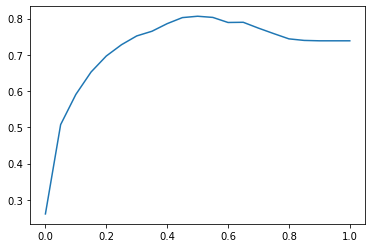

In [61]:
plt.plot(thresholds, accuracies)

To check its accuracy we first make predictions on the validation dataset and then compute the accuracy score

In [62]:
val_dict_small = df_val[small_subset].to_dict(orient='records')

X_small_val = dv_small.transform(val_dict_small)
y_pred_small = model_small.predict_proba(X_small_val)[:, 1]

churn_small = y_pred_small >= 0.5
accuracy_score(y_val, churn_small)

NameError: name 'small_subset' is not defined

## Dummy Baseline

baseline prediction

In [63]:
size_val = len(y_val)
baseline = np.repeat(False, size_val)

In [64]:
accuracy_score(baseline, y_val)

0.7387096774193549

In [65]:
t = 0.5
predict_churn = (y_pred >= t)
predict_no_churn = (y_pred < t)

actual_churn = (y_val == 1)
actual_no_churn = (y_val == 0)


true_positive = (predict_churn & actual_churn).sum()
false_positive = (predict_churn & actual_no_churn).sum()

false_negative = (predict_no_churn & actual_churn).sum()
true_negative = (predict_no_churn & actual_no_churn).sum()

put above values together in NumPy

In [66]:
true_positive = ((y_pred >= 0.5) & (y_val == 1)).sum()
false_positive = ((y_pred >= 0.5) & (y_val == 0)).sum()
false_negative = ((y_pred < 0.5) & (y_val == 1)).sum()
true_negative = ((y_pred < 0.5) & (y_val == 0)).sum()

In [67]:
confusion_table = np.array(
[[true_negative, false_positive],
[false_negative, true_positive]])

In [68]:
confusion_table

array([[1209,  165],
       [ 195,  291]])

In [69]:
confusion_table / confusion_table.sum()

array([[0.65      , 0.08870968],
       [0.10483871, 0.15645161]])

In [70]:
precision = true_positive / (true_positive + false_positive)
recall = true_positive / (true_positive + false_negative)
precision, recall

(0.6381578947368421, 0.5987654320987654)

confusion table not working for small data set

In [71]:
# t = 0.5
# s_predict_churn = (y_pred_small >= t)
# s_predict_no_churn = (y_pred_small < t)

# s_actual_churn = (y_val == 1)
# s_actual_no_churn = (y_val == 0)


# s_true_positive = (churn_small & actual_churn).sum()
# s_false_positive = (churn_small & actual_no_churn).sum()

# s_false_negative = (predict_no_churn & actual_churn).sum()
# s_true_negative = (predict_no_churn & actual_no_churn).sum()

In [72]:
# s_confusion_table = np.array(
# [[s_true_negative, s_false_positive],
# [s_false_negative, s_true_positive]])

In [73]:
# s_confusion_table

accuracy = (TN + TP) / (TN + TP + FN +FP)

## Precision and Recall

accuracy can be misleading when dealing with imbalanced datasets, in which case we can use precision and recall

### Precision
the precision of a model tells us how many of the positive predictions turned out to be correct.

Precision = TP / (TP + FP)

The better the precision, the fewer false positives we have.

### Recall
Recall is the fraction of correctly classified positive examples among all positive examples

Recall = TP / (TP + FN)

the better the recall, the fewer false negatives we have.

## ROC curve and AUC score

### ROC - Receiver Operating Characteristic
shows how well a model can separate two classes, positive and negative

two metrics are needed for ROC curves:
- TPR (True positive rate)
    - TPR = TP / (TP + FN)
- FPR (False positive rate)
    - FPR = TP / (TP + FN)

In [74]:
scores = []

thresholds = np.linspace(0, 1, 101)

for t in thresholds:
    tp = ((y_pred >= t) & (y_val == 1)).sum()
    fp = ((y_pred >= t) & (y_val == 0)).sum()
    fn = ((y_pred < t) & (y_val == 1)).sum()
    tn = ((y_pred < t) & (y_val == 0)).sum()
    scores.append((t, tp, fp, fn, tn))

In [75]:
df_scores = pd.DataFrame(scores)
df_scores.columns = ['threshold', 'tp', 'fp', 'fn', 'tn']

change the list into a pandas dataframe (b/c df are easier to handle than a list of tuples

In [76]:
df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)

In [77]:
df_scores[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,486,1374,0,0,1.000000,1.000000
10,0.1,460,735,26,639,0.946502,0.534934
20,0.2,417,495,69,879,0.858025,0.360262
30,0.3,375,350,111,1024,0.771605,0.254731
40,0.4,331,243,155,1131,0.681070,0.176856
50,0.5,291,165,195,1209,0.598765,0.120087
60,0.6,200,106,286,1268,0.411523,0.077147
70,0.7,111,46,375,1328,0.228395,0.033479
80,0.8,20,10,466,1364,0.041152,0.007278
90,0.9,0,0,486,1374,0.000000,0.000000


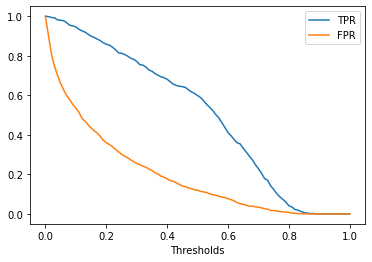

In [78]:
plt.plot(df_scores.threshold, df_scores.tpr, label="TPR")
plt.plot(df_scores.threshold, df_scores.fpr, label='FPR')
plt.xlabel('Thresholds')
plt.legend()

As the threshold grows, both metrics decline but at different rates.. 

Ideally, FPR should go down very quickly. A small FPR indicates that the model makes very few mistakes predicting negative examples (false positives).

To better  understand what these TPR and FPR mean, we'll compare them with two baseline models: a random model and the ideal model.

## Random baseline model

A random model outputs a random score between 0 and 1, regardless of the input.

In [79]:
np.random.seed(1)
y_rand = np.random.uniform(0, 1, size=len(y_val))

In [80]:
def tpr_fpr_dataframe(y_val, y_pred):
    scores = []

    thresholds = np.linspace(0, 1, 101)

    for t in thresholds:
        tp = ((y_pred >= t) & (y_val == 1)).sum()
        fp = ((y_pred >= t) & (y_val == 0)).sum()
        fn = ((y_pred < t) & (y_val == 1)).sum()
        tn = ((y_pred < t) & (y_val == 0)).sum()

        scores.append((t, tp, fp, fn, tn))

    df_scores = pd.DataFrame(scores)
    df_scores.columns = ['threshold', 'tp', 'fp', 'fn', 'tn']

    df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
    df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)

    return df_scores

we'll use the above function to calculate the TPR and FPR for the random model:

In [81]:
df_rand = tpr_fpr_dataframe(y_val, y_rand)

now we create a datagrame with TPR and FPR values at different thresholds

In [82]:
np.random.seed(1)
y_rand = np.random.uniform(0, 1, size=len(y_val))
df_rand = tpr_fpr_dataframe(y_val, y_rand)
df_rand[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,486,1374,0,0,1.000000,1.000000
10,0.1,440,1236,46,138,0.905350,0.899563
20,0.2,392,1101,94,273,0.806584,0.801310
30,0.3,339,972,147,402,0.697531,0.707424
40,0.4,288,849,198,525,0.592593,0.617904
50,0.5,239,723,247,651,0.491770,0.526201
60,0.6,193,579,293,795,0.397119,0.421397
70,0.7,152,422,334,952,0.312757,0.307132
80,0.8,98,302,388,1072,0.201646,0.219796
90,0.9,57,147,429,1227,0.117284,0.106987


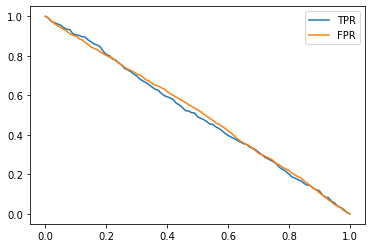

In [83]:
plt.plot(df_rand.threshold, df_rand.tpr, label='TPR')
plt.plot(df_rand.threshold, df_rand.fpr, label='FPR')
plt.legend()

## Ideal Model

The ideal model always makes correct decisions.

In [84]:
num_neg = (y_val == 0).sum()
num_pos = (y_val == 1).sum()

y_ideal = np.repeat([0, 1], [num_neg, num_pos])
y_pred_ideal = np.linspace(0, 1, num_neg + num_pos)

df_ideal = tpr_fpr_dataframe(y_ideal, y_pred_ideal)

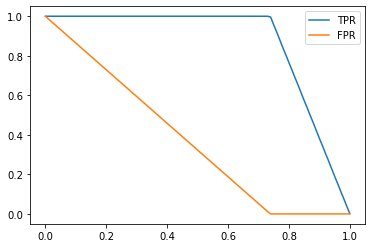

In [85]:
plt.plot(df_ideal.threshold, df_ideal.tpr, label='TPR')
plt.plot(df_ideal.threshold, df_ideal.fpr, label='FPR')
plt.legend()

## ROC Curve

To create an ROC curve, instead of plotting FPR and TPR against different threshold values, we plot them against each other. 

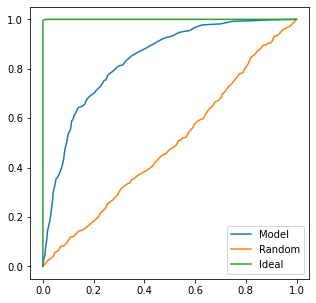

In [86]:
plt.figure(figsize=(5, 5))

plt.plot(df_scores.fpr, df_scores.tpr, label='Model')
plt.plot(df_rand.fpr, df_rand.tpr, label='Random')
plt.plot(df_ideal.fpr, df_ideal.tpr, label='Ideal')

plt.legend()

We want our model to be as close to the ideal curve as possible and as far from the random curve

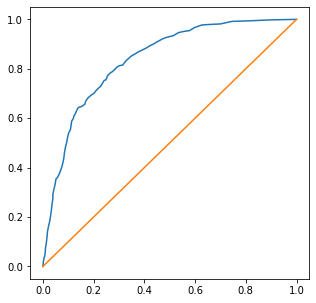

In [87]:
plt.figure(figsize=(5, 5))
plt.plot(df_scores.fpr, df_scores.tpr)
plt.plot([0, 1], [0, 1])

roc_curve function from the metrics package of scikit-learn

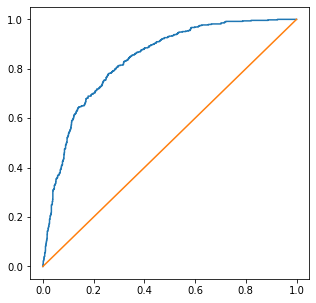

In [88]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred)

plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])

Exmple  of the ROC curves of teh large and small models and plot them on the same graph

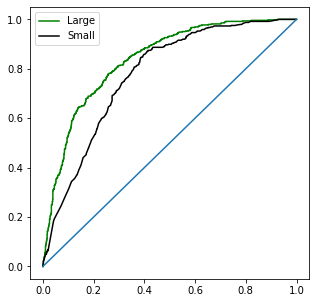

In [91]:
fpr_large, tpr_large, _ = roc_curve(y_val, y_pred)
fpr_small, tpr_small, _ = roc_curve(y_val, y_pred_small)

plt.figure(figsize=(5, 5))

plt.plot(fpr_large, tpr_large, color='green', label='Large')
plt.plot(fpr_small, tpr_small, color='black', label='Small')
plt.plot([0, 1], [0, 1])
plt.legend()

## Area under the ROC curve (AUC)

auc is a metric for evaluating the performance of a binary classification model. 

used to quantify the closeness, by measuring the are under the ROC curve

An AUC of 0.9 is indicative of a reasonably good model; 0.8 is okay, 0.7 is not very performant, and 0.6 indicates quite poor performance

In [92]:
from sklearn.metrics import auc
auc(df_scores.fpr, df_scores.tpr)

0.8363905511528025

In [93]:
df_scores_small = tpr_fpr_dataframe(y_val, y_pred_small)

In [94]:
auc(df_scores_small.fpr, df_scores_small.tpr)

0.7732335076464139

In [95]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_val, y_pred)

0.8366990433746054

ROC curveas and AUC scores tell us how well the model separates positive and negative examples

In [96]:
roc_auc_score(y_val, y_pred_small)

0.7746531708807303

Interpretation of AUC: the probability that a randomly chosen positive example ranks higher than a randomly chosen negative example

In [97]:
neg = y_pred[y_val == 0]
pos = y_pred[y_val == 1]

np.random.seed(1)
neg_choice = np.random.randint(low=0, high=len(neg), size=10000)
pos_choice = np.random.randint(low=0, high=len(pos), size=10000)
(pos[pos_choice] > neg[neg_choice]).mean()

0.8368

## Parameter Tuning

#### K-fold cross-validation

first we'll  put all the code for training into train function, which first converts the data into a one-hot encoding representation and then trains the model

In [98]:
def train(df, y):
    cat = df[categorical + numerical].to_dict(orient='records')
    
    dv = DictVectorizer(sparse=False)
    dv.fit(cat)
    
    X = dv.transform(cat)
    
    model = LogisticRegression(solver='liblinear')
    model.fit(X, y)
    
    return dv, model

We also put the prediction logic into a predict funtion, which takes in a dagtaframe with customers, the vectorizer we "trained" previously - for doing some one hot encoding - and the model. Then we apply the vectorizer to the dataframe, get a matrix, and finally apply the model to the matrix to get predictions.

In [99]:
def predict(df, dv, model):
    cat = df[categorical + numerical].to_dict(orient='records')
    
    X = dv.transform(cat)
    y_pred = model.predict_proba(X)[:, 1]
    
    return y_pred

Now we can use these functions for implementing K-fold cross-validation. 

We don't need to implement cross-validation ourselves: in Scikit-learn there's a class for doing that. It's called KFold and it lives in the model_selection package

In [100]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=10, shuffle=True, random_state=1)

aucs = []

for train_idx, val_idx in kfold.split(df_train_full):
    df_train = df_train_full.iloc[train_idx]
    y_train = df_train.churn.values

    df_val = df_train_full.iloc[val_idx]
    y_val = df_val.churn.values

    dv, model = train(df_train, y_train)
    y_pred = predict(df_val, dv, model)

    rocauc = roc_auc_score(y_val, y_pred)
    aucs.append(rocauc)

In [101]:
np.array(aucs)

array([0.85185185, 0.84178527, 0.85651878, 0.82892766, 0.82703164,
       0.83812854, 0.83871703, 0.82771189, 0.84256707, 0.85679473])

In [102]:
print('auc = %0.3f ± %0.3f' % (np.mean(aucs), np.std(aucs)))

auc = 0.841 ± 0.011


Now, not only do we know the average performance, but we also have an idea of how volatile that performance is, or how far it may deviate from the average

Now we can use K-fold cross-validation for parameter tuning ( selecting the best parameters)

below we adjust the train function to take in an additional parameter

In [111]:
def train(df, y, C):
    cat = df[categorical + numerical].to_dict(orient='records')
    
    dv = DictVectorizer(sparse=False)
    dv.fit(cat)
    
    X = dv.transform(cat)
    
    model = LogisticRegression(solver='liblinear', C=C)
    model.fit(X, y)
    
    return dv, model

Nowewe'll find the best parameter C.
* Loop over different values of C.
* For each C, run cross-validation and record the mean AUC across all folds as well as the standard deviation

In [112]:
nfolds = 5
kfold = KFold(n_splits=nfolds, shuffle=True, random_state=1)

for C in [0.001, 0.01, 0.1, 0.5, 1, 10]:
    aucs = []

    for train_idx, val_idx in kfold.split(df_train_full):
        df_train = df_train_full.iloc[train_idx]
        df_val = df_train_full.iloc[val_idx]

        y_train = df_train.churn.values
        y_val = df_val.churn.values

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)
        
        auc = roc_auc_score(y_val, y_pred)
        aucs.append(auc)

    print('C=%s, auc = %0.3f ± %0.3f' % (C, np.mean(aucs), np.std(aucs)))

C=0.001, auc = 0.819 ± 0.013
C=0.01, auc = 0.838 ± 0.008
C=0.1, auc = 0.840 ± 0.007
C=0.5, auc = 0.840 ± 0.007
C=1, auc = 0.840 ± 0.007
C=10, auc = 0.835 ± 0.006


When the C parameter is small, the model is more regularized. The weights of the model are more restricted, so in general, rhey are smaller. Small weights in the model give us additional assurance that the model will behave well when we use it on real data.

In [118]:
y_train = df_train_full.churn.values
y_test = df_test.churn.values

dv, model = train(df_train_full, y_train, C=0.5)
y_pred = predict(df_test, dv, model)

auc = roc_auc_score(y_test, y_pred)
print('auc = %.3f' % auc)

auc = 0.857
